<a href="https://colab.research.google.com/github/artphys/Colab/blob/main/PnP_Geolocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

In [444]:
import matplotlib.pyplot as plt

In [445]:

points = np.asanyarray(
        [(402.53841229193335493619088083506, 1042.8969270166453497949987649918),
        (739.0592563903950349413207732141,   737.46669248644434446759987622499),
        (1064.4752130131680587510345503688,  436.04453911696316481538815423846),
        (1445.3768396591788132354849949479,  768.95855925639011729799676686525),
        (1853.2714949651433471444761380553,  373.06080557707161915459437295794),
        (1497.8632842757549497036961838603,  20.651820294345468628969790859799)]
        )

points_2D = points

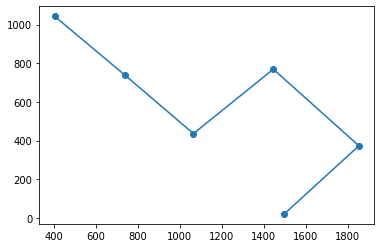

In [446]:
x, y = zip(*points_2D)
plt.scatter(x, y)
plt.plot(x, y)

In [447]:
x, y, z = np.zeros(6), np.zeros(6), np.zeros(6)
# FROM AERIAL IMAGERY:  world points must be converted to ECEF  


#points_lla = np.asanyarray(
#        [(31.5944594,34.6125853,83.1465369),
#        (31.5946889,34.6125481,82.574187 ),
#        (31.5945089,34.6123806,83.1020015),
#        (31.5945264,34.6123929,83.0722942),
#        (31.5945082,34.6121296,82.6599009),
#        (31.5944436,34.611917 ,82.4766086)]
#       )

points_lla = np.asanyarray(
        [(31.59443,34.61249,82.0),
        ( 31.59444,34.61230,82.0 ),
        ( 31.59444,34.61209,82.0),
        ( 31.59463,34.61209,82.0),
        ( 31.59463,34.61185,82.0),
        ( 31.59444,34.61186 ,82.0)]
        )

#x[0],y[0],z[0] = lla2ecef(31.5944594*np.pi/180,34.6125853*np.pi/180,83.1465369)
#x[1],y[1],z[1] = lla2ecef(31.5946889*np.pi/180,34.6125481*np.pi/180,82.574187 )
#x[2],y[2],z[2] = lla2ecef(31.5945089*np.pi/180,34.6123806*np.pi/180,83.1020015)
#x[3],y[3],z[3] = lla2ecef(31.5945264*np.pi/180,34.6123929*np.pi/180,83.0722942)
#x[4],y[4],z[4] = lla2ecef(31.5945082*np.pi/180,34.6121296*np.pi/180,82.6599009)
#x[5],y[5],z[5] = lla2ecef(31.5944436*np.pi/180,34.611917 *np.pi/180,82.4766086)

x[0],y[0],z[0] = lla2ecef(31.59443*np.pi/180,34.61249*np.pi/180,82.0)
x[1],y[1],z[1] = lla2ecef(31.59444*np.pi/180,34.61230*np.pi/180,82.0 )
x[2],y[2],z[2] = lla2ecef(31.59444*np.pi/180,34.61209*np.pi/180,82.0)
x[3],y[3],z[3] = lla2ecef(31.59463*np.pi/180,34.61209*np.pi/180,82.0)
x[4],y[4],z[4] = lla2ecef(31.59463*np.pi/180,34.61185*np.pi/180,82.0)
x[5],y[5],z[5] = lla2ecef(31.59444*np.pi/180,34.61186*np.pi/180,82.0)

points_3D = np.array([(x[i], y[i], z[i]) for i in range(len(x))])

In [448]:

def lla2ecef(lat,lon,alt):
    # %WGS84 ellipsoid constants:
    a = 6378137
    e = 8.1819190842622e-2

    # intermediate calculation
    # (prime vertical radius of curvature)
    N = np.divide(a , np.sqrt(1- np.multiply(e**2, np.power(np.sin(lat), 2))))

    # results:
    x = np.multiply((N+alt) , np.multiply(np.cos(lat), np.cos(lon)))
    y = np.multiply((N+alt), np.multiply(np.cos(lat), np.sin(lon)))
    z = np.multiply(np.multiply((1-e**2), N) + alt, np.sin(lat))

    return x, y, z

In [449]:
    fx = 1100.7622070312500
    fy = 1102.0703125000000
    cx = 494.43371582031250
    cy = 311.53576660156250
    s = 0

    IntrinsicMatrix = np.matrix([(fx, 0, 0), (s, fy, 0), (cx, cy, 1)])

In [450]:
    k2 = 0.15480099999999999
    k4 = -0.051244999999999999
    radialDistortion = np.matrix([k2, k4, 0.0, 0.0])

In [451]:
success, rotation_vector, translation_vector = cv2.solvePnP(points_3D, points_2D, IntrinsicMatrix, radialDistortion, flags=0)
rotation_vector, translation_vector = cv2.solvePnPRefineLM(points_3D, points_2D, IntrinsicMatrix, radialDistortion, rotation_vector, translation_vector)


In [452]:
success, rotation_vector, translation_vector

(True, array([[-1.32061848],
        [ 1.79347836],
        [ 0.21285583]]), array([[1048834.70225471],
        [-161070.57973721],
        [6283472.25179637]]))

In [453]:
np_rodrigues = np.asarray(rotation_vector[:,:],np.float64)
rmat = cv2.Rodrigues(np_rodrigues)[0]
camera_position = np.array( -np.matrix(rmat).T @ np.matrix(translation_vector))

In [454]:
print (camera_position)

[[4475470.22372849]
 [3088825.57364855]
 [3322249.89359619]]


In [455]:
import pyproj

x = camera_position[0][0]
y = camera_position[1][0]
z = camera_position[2][0]

cam_pos_ecef = [x, y, z]

print (x)

ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
lon, lat, alt = pyproj.transform(ecef, lla, x, y, z, radians=True)

print (lat*180.0/np.pi, lon*180.0/np.pi, alt)

4475470.223728487
31.594081846876517 34.612189480566535 139.10074221063405


<ipython-input-455-481e0424ce47>:14: FutureWarning:

This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1



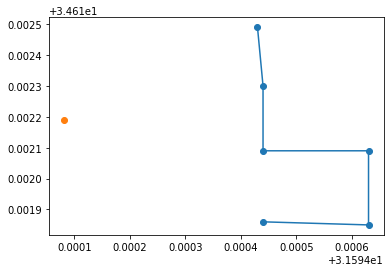

In [456]:
x, y, z= zip(*points_lla)
plt.scatter(x, y)
plt.plot(x, y)
plt.scatter(lat*180/np.pi, lon*180/np.pi)

In [457]:
projected_points, _ = cv2.projectPoints(points_3D, rotation_vector, translation_vector, IntrinsicMatrix, radialDistortion)

In [458]:
points_proj = projected_points[:, 0]

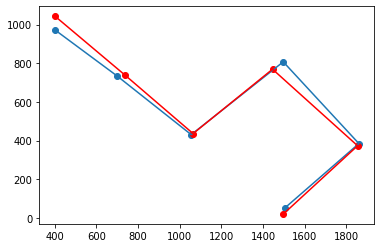

In [459]:
x, y= zip(*points_proj)
plt.scatter(x, y)
plt.plot(x, y)

x, y = zip(*points_2D)
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'red')